In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Ensemble

여러개의 분류기를 결합시켜서 최종 예측 값을 도출하는 기법

- 보팅 - 여러 개의 분류기(서로 다른)가 투표를 통해 최종 예측 결과를 결정하는 방식으로 소프트 보팅과 하드 보팅으로 나뉘어진다.
 - 소프트 보팅: 분류기 마다 레이블에 대한 확률 값을 기준으로 평균을 내어서 확률이 높은 레이블을 최종 값으로 결정하는 방식
 - 하드 보팅 : 다수결의 원칙 , 여러 분류기가 예측한 레이블 중에 가장 많은 수가 예측한 레이블로 최종 값을 결정하는 방식

- 스택킹 - 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법이다.

- 배깅 - 여러 개의 분류기(동일한)가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 대부분 소프트 보팅 방식을 활용한다.
 - 배깅이라고 부르는 이유는 개별 분류기에 원본 학습데이터에 샘플링을 통해서 학습을 시키는 데 이 방식을 부트스트래핑(Bootstrapping) 분할 방식이라고 하는데 이를 줄여서 배깅이라고 함 (Bootstrap Aggregating)

- 부스팅 - 여러 개의 분류기가 순차적으로 학습을 수행하는데 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게 가중치를 부여하면서 예측을 진행하는 방식이다.

## Voting Classifier (보팅 방식 중 소프트 보팅)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()

df_train = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target = pd.DataFrame(cancer.target, columns=['class'])
df = pd.concat([df_train, df_target], axis=1)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


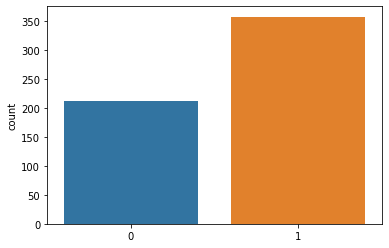

In [ ]:
sns.countplot(cancer.target)

In [ ]:
# 개별 모델은 로지스틱 회귀 모델과 KNN 모델
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=5)

classifiters = [lr_clf, knn_clf]

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
# vo_clf = VotingClassifier(estimators=classifiters, voting='soft')
vo_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn', knn_clf)], voting='soft')

# 데이터 셋을 나눔
x_train, x_test, y_train, y_test  = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 성능평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기의 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델 성능 평가
for classifiter in classifiters:
  classifiter.fit(x_train, y_train)
  pred = classifiter.predict(x_test)
  name = classifiter.__class__.__name__
  print('{0} 의 정확도: {1:.4f}'.format(name, accuracy_score(y_test, pred)))

Voting 분류기의 정확도: 0.9474
LogisticRegression 의 정확도: 0.9386
KNeighborsClassifier 의 정확도: 0.9035


어느 정도 성능 향상을 보임

In [ ]:
# 개별 모델은 로지스틱 회귀 모델과 KNN 모델
# n_neighbors 값을 바꿈
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=15)

classifiters = [lr_clf, knn_clf]

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
# vo_clf = VotingClassifier(estimators=classifiters, voting='soft')
vo_clf = VotingClassifier(estimators=[('lr', lr_clf), ('knn', knn_clf)], voting='soft')

# 데이터 셋을 나눔
x_train, x_test, y_train, y_test  = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

# VotingClassifier 성능평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기의 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델 성능 평가
for classifiter in classifiters:
  classifiter.fit(x_train, y_train)
  pred = classifiter.predict(x_test)
  name = classifiter.__class__.__name__
  print('{0} 의 정확도: {1:.4f}'.format(name, accuracy_score(y_test, pred)))

Voting 분류기의 정확도: 0.9474
LogisticRegression 의 정확도: 0.9386
KNeighborsClassifier 의 정확도: 0.9561


하지만 개별 분류기가 성능이 더 좋을 수도 있음 

따라서 만능은 아님

그러나 암상블은 과적합의 오류를 줄여줄 수 있음

예를 들어 한 분야의 전문가만 모인 집단 보다는 여러 분야의 지식을 가진 집단이 조금 더 프로젝트의 결과가 좋을 수도 있기 때문임

따라서 ML 모델의 중요한 평가 요소는 높은 유연성을 가지고 현실에 대처할 수 있느 냐이다. 

이런 관점에서 편향과 분산의 트레이드 오프는 ML 모델이 극복해야할 과제이다.

## RandomForest (배깅 방식)

결정 트리 알고리즘은 쉽고 직관적인 분류 기준을 가지고 있지만 정확한 예측을 위해 학습 데이터의 예외 상황에 집착한 나머지 오히려 과적합이 발생해 실제 테스트에서 예측 성능이 떨어지는 현상이 발생하기 쉽다.

하지만 앙상블 학습에서는 이러한 결정 트리의 단접을 매우 많은 분류가를 결합해 다양한 학습을 학습하게 함으로써 극복할 수 있다, 결정 트리의 장점은 그대로 가져오고 단점은 보완하는 방식이 바로 랜덤포레스트 이다.

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.999918,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.999867,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.999845,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('기본 값으로 학습한 RandomForest의 정확도: {:.4f}'.format(accuracy))

기본 값으로 학습한 RandomForest의 정확도: 0.9253


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 16, random_state=156)

dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('최적의 하이퍼 파라미터로 학습한 DecisionTree의 정확도: {0:.4f}'.format(accuracy))

최적의 하이퍼 파라미터로 학습한 DecisionTree의 정확도: 0.8717


In [ ]:
import numpy as np

# feature이 2개라는 가정하에 만들기 때문에 2차원 그래프로 나타낼 수 있음

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary_6(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()))
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()))

RandomForest


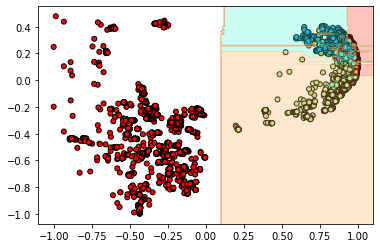

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)
cols = ['tGravityAcc-min()-X', 'angle(Y,gravityMean)']
X = X_train[cols].values
y = y_train.values

print('RandomForest')
visualize_boundary_6(rf_clf, X, y)

DecisionTree


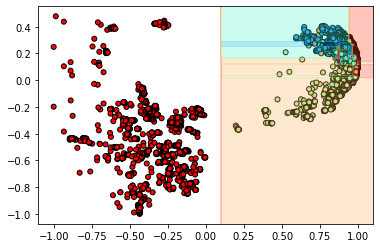

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 16, random_state=156)
cols = ['tGravityAcc-min()-X', 'angle(Y,gravityMean)']
X = X_train[cols].values
y = y_train.values

print('DecisionTree')
visualize_boundary_6(dt_clf, X, y)

RandomForest 가 DecisionTree 보다 성능이 더 좋다는 것을 알 수 있음

그런데 단점이 있다면 RandomForest는 DecisionTree와 동일한 파라미터를 사용하기 때문에 많은 하이퍼 파라미터를 가지고 있기 때문에 하이퍼 파라미터 튜닝을 위한 시간이 많이 소모됨

### 하이퍼 파라미터 튜닝

n_estimators=100 : 사용할 모델의 총 개수

criterion='gini', 

max_depth=None, 

min_samples_split=2, 

min_samples_leaf=1, 

min_weight_fraction_leaf=0.0, 

max_features='auto', 

max_leaf_nodes=None, 

min_impurity_decrease=0.0, 

min_impurity_split=None, 

bootstrap=True, 

oob_score=False, 

n_jobs=None, 

random_state=None, 

verbose=0, 

warm_start=False, 

class_weight=None, 

ccp_alpha=0.0, 

max_samples=None)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [ 6, 8, 10, 12],
    'min_samples_split' : [8, 16, 20],
    'min_samples_leaf': [8, 12, 18]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# 하이퍼 파라미터 튜닝
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=2, n_jobs=-1)
grid_cv.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)
print('GridSearchCV 최고 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 수치:0.9180


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth= 10, min_samples_leaf = 8, min_samples_split = 8, n_estimators = 300, random_state=0)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)

print('최적의 파라미터로 학습한 RandomForest의 정확도: {:.4f}'.format(accuracy))

최적의 파라미터로 학습한 RandomForest의 정확도: 0.9165


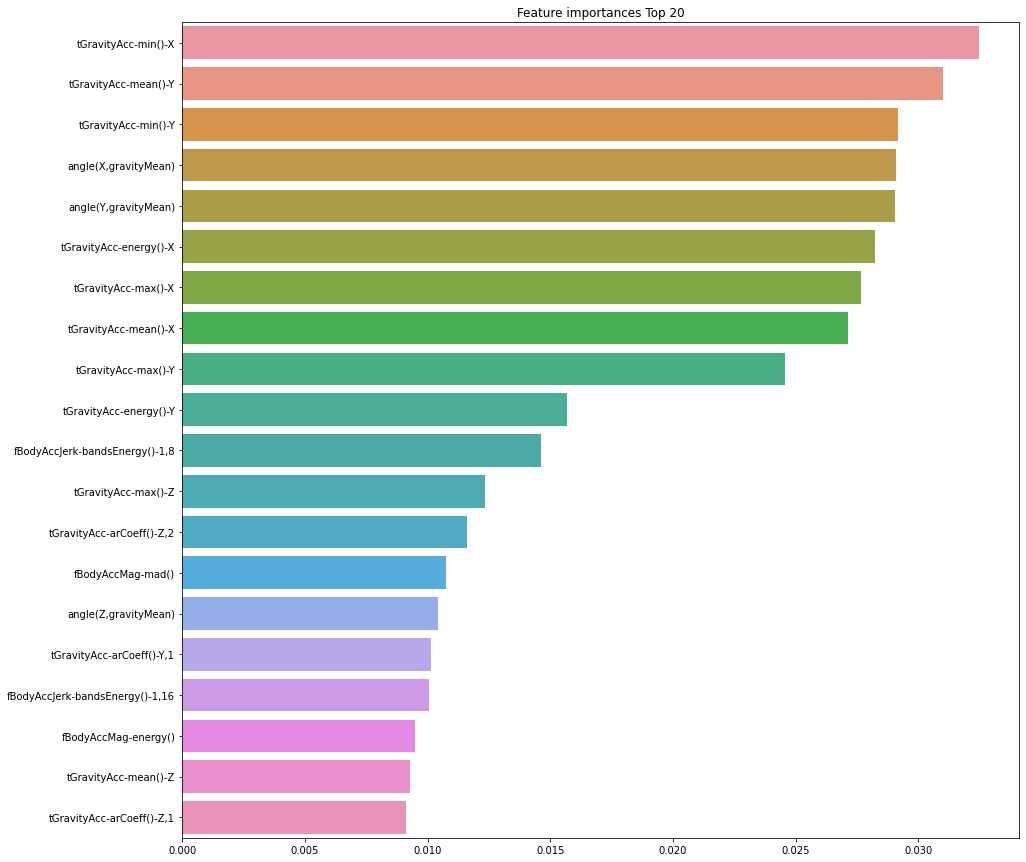

In [ ]:
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(15,15))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

RandomForest


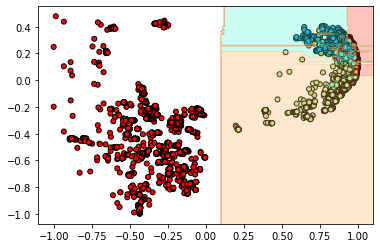

In [ ]:
rf_clf = RandomForestClassifier(random_state=0)
cols = ['tGravityAcc-min()-X', 'angle(Y,gravityMean)']
X = X_train[cols].values
y = y_train.values

print('RandomForest')
visualize_boundary_6(rf_clf, X, y)

엄청난 성능 향상을 가져오지는 않음

경우에 따라서 성능이 더 하락할 수도 있음

## GBM (부스팅 방식)

시간이 너무 오래걸려서 못하겠음

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Study/파이썬 머신러닝 완벽가이드/data/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0, n_jobs = -1)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

TypeError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 78.3min finished


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))